In [1]:
# All imports.
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load data.
recipes = pd.read_csv('recipe_site_traffic.csv')
# Check the data.
recipes.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Check missing values and types of the data.
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


There are 947 observations total in `recipes` DF. There are missing values in columns `calories`, `carbohydrate`, `sugar`, `protein` and `high_traffic` (target variable by the way).
- Before any cleaning steps, let's check duplicates in `recipe` column because a recipe shouldn't be repeted.
- After, it is needed to understand nature of missing values for incomplete columns.
- Column `category` will transform to _category_ type and One-Hot Encoding will be used (for machine learning models).
- `servings` column has info about amount of servings, so the type of this data should be _int_.
- `high_traffic`: there is only 'High' value in this column, so the data in the column will be changed to 1 and 0 (for machine learning models).

In [4]:
# Check for duplicates in `recipe` column.
recipes.duplicated(subset='recipe').sum()

0

In [5]:
# Check missing values in columns_nutritions.
columns_nutritions = ['calories', 'carbohydrate', 'sugar', 'protein']
missing_percentages = round(recipes[columns_nutritions].isnull().mean() * 100, 2)
missing_percentages

calories        5.49
carbohydrate    5.49
sugar           5.49
protein         5.49
dtype: float64

In [6]:
null_rows = recipes[recipes[columns_nutritions].isnull().any(axis=1)]
null_rows

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


Based on the table above I assume that nutrition data is missing without any correlation, because if the data is missing, it is for the whole recipe.
I'll drop this data later because I need to check another columns (there are also some null-values in other columns).

In [7]:
# Check `category` column then.
recipes['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

According to the task, in `category` column should be data such as: 'Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',  'Dessert', but there is extra 'Chicken Breast' category in the column. I assume, it is just 'Chicken'.

In [8]:
# Replace 'Chicken Breast' with 'Chicken'.
recipes['category'] = recipes['category'].str.replace(" Breast", "")
# Change type of `category` column from 'object' to 'category'.
recipes['category'] = recipes['category'].astype('category')
# Check `category` column again.
recipes['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [9]:
# Check `servings` column.
recipes['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

As can be seen, some records in the data are represented by text. Delete the unnecessary, leaving only the number of servings.

In [10]:
# Replace ' as a snack' with ''.
recipes['servings'] = recipes['servings'].str.replace(" as a snack", "")
# Now it is possible to change type of `servings` column (object -> int).
recipes['servings'] = recipes['servings'].astype('int')
# Check `servings` values again.
recipes['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [11]:
# And check `high_traffic` column.
recipes['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

The task says that the `high_traffic` field has one value, _High_, so I will replace the _High_ values with **True** and _null_ with **False**.

In [12]:
recipes['high_traffic'] = np.where(recipes['high_traffic'] == "High", 1, 0)
# Check `high_traffic` column again.
recipes['high_traffic'].value_counts()

1    574
0    373
Name: high_traffic, dtype: int64

In [13]:
# Cleaning data is complete. Deal with the remaining fields (just remove missing values without any further action).
recipes = recipes.dropna().reset_index(drop=True)
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 50.3 KB


Now, finally, let's look at the data to understand how it is distributed and how to prepare it for transfer to the models.

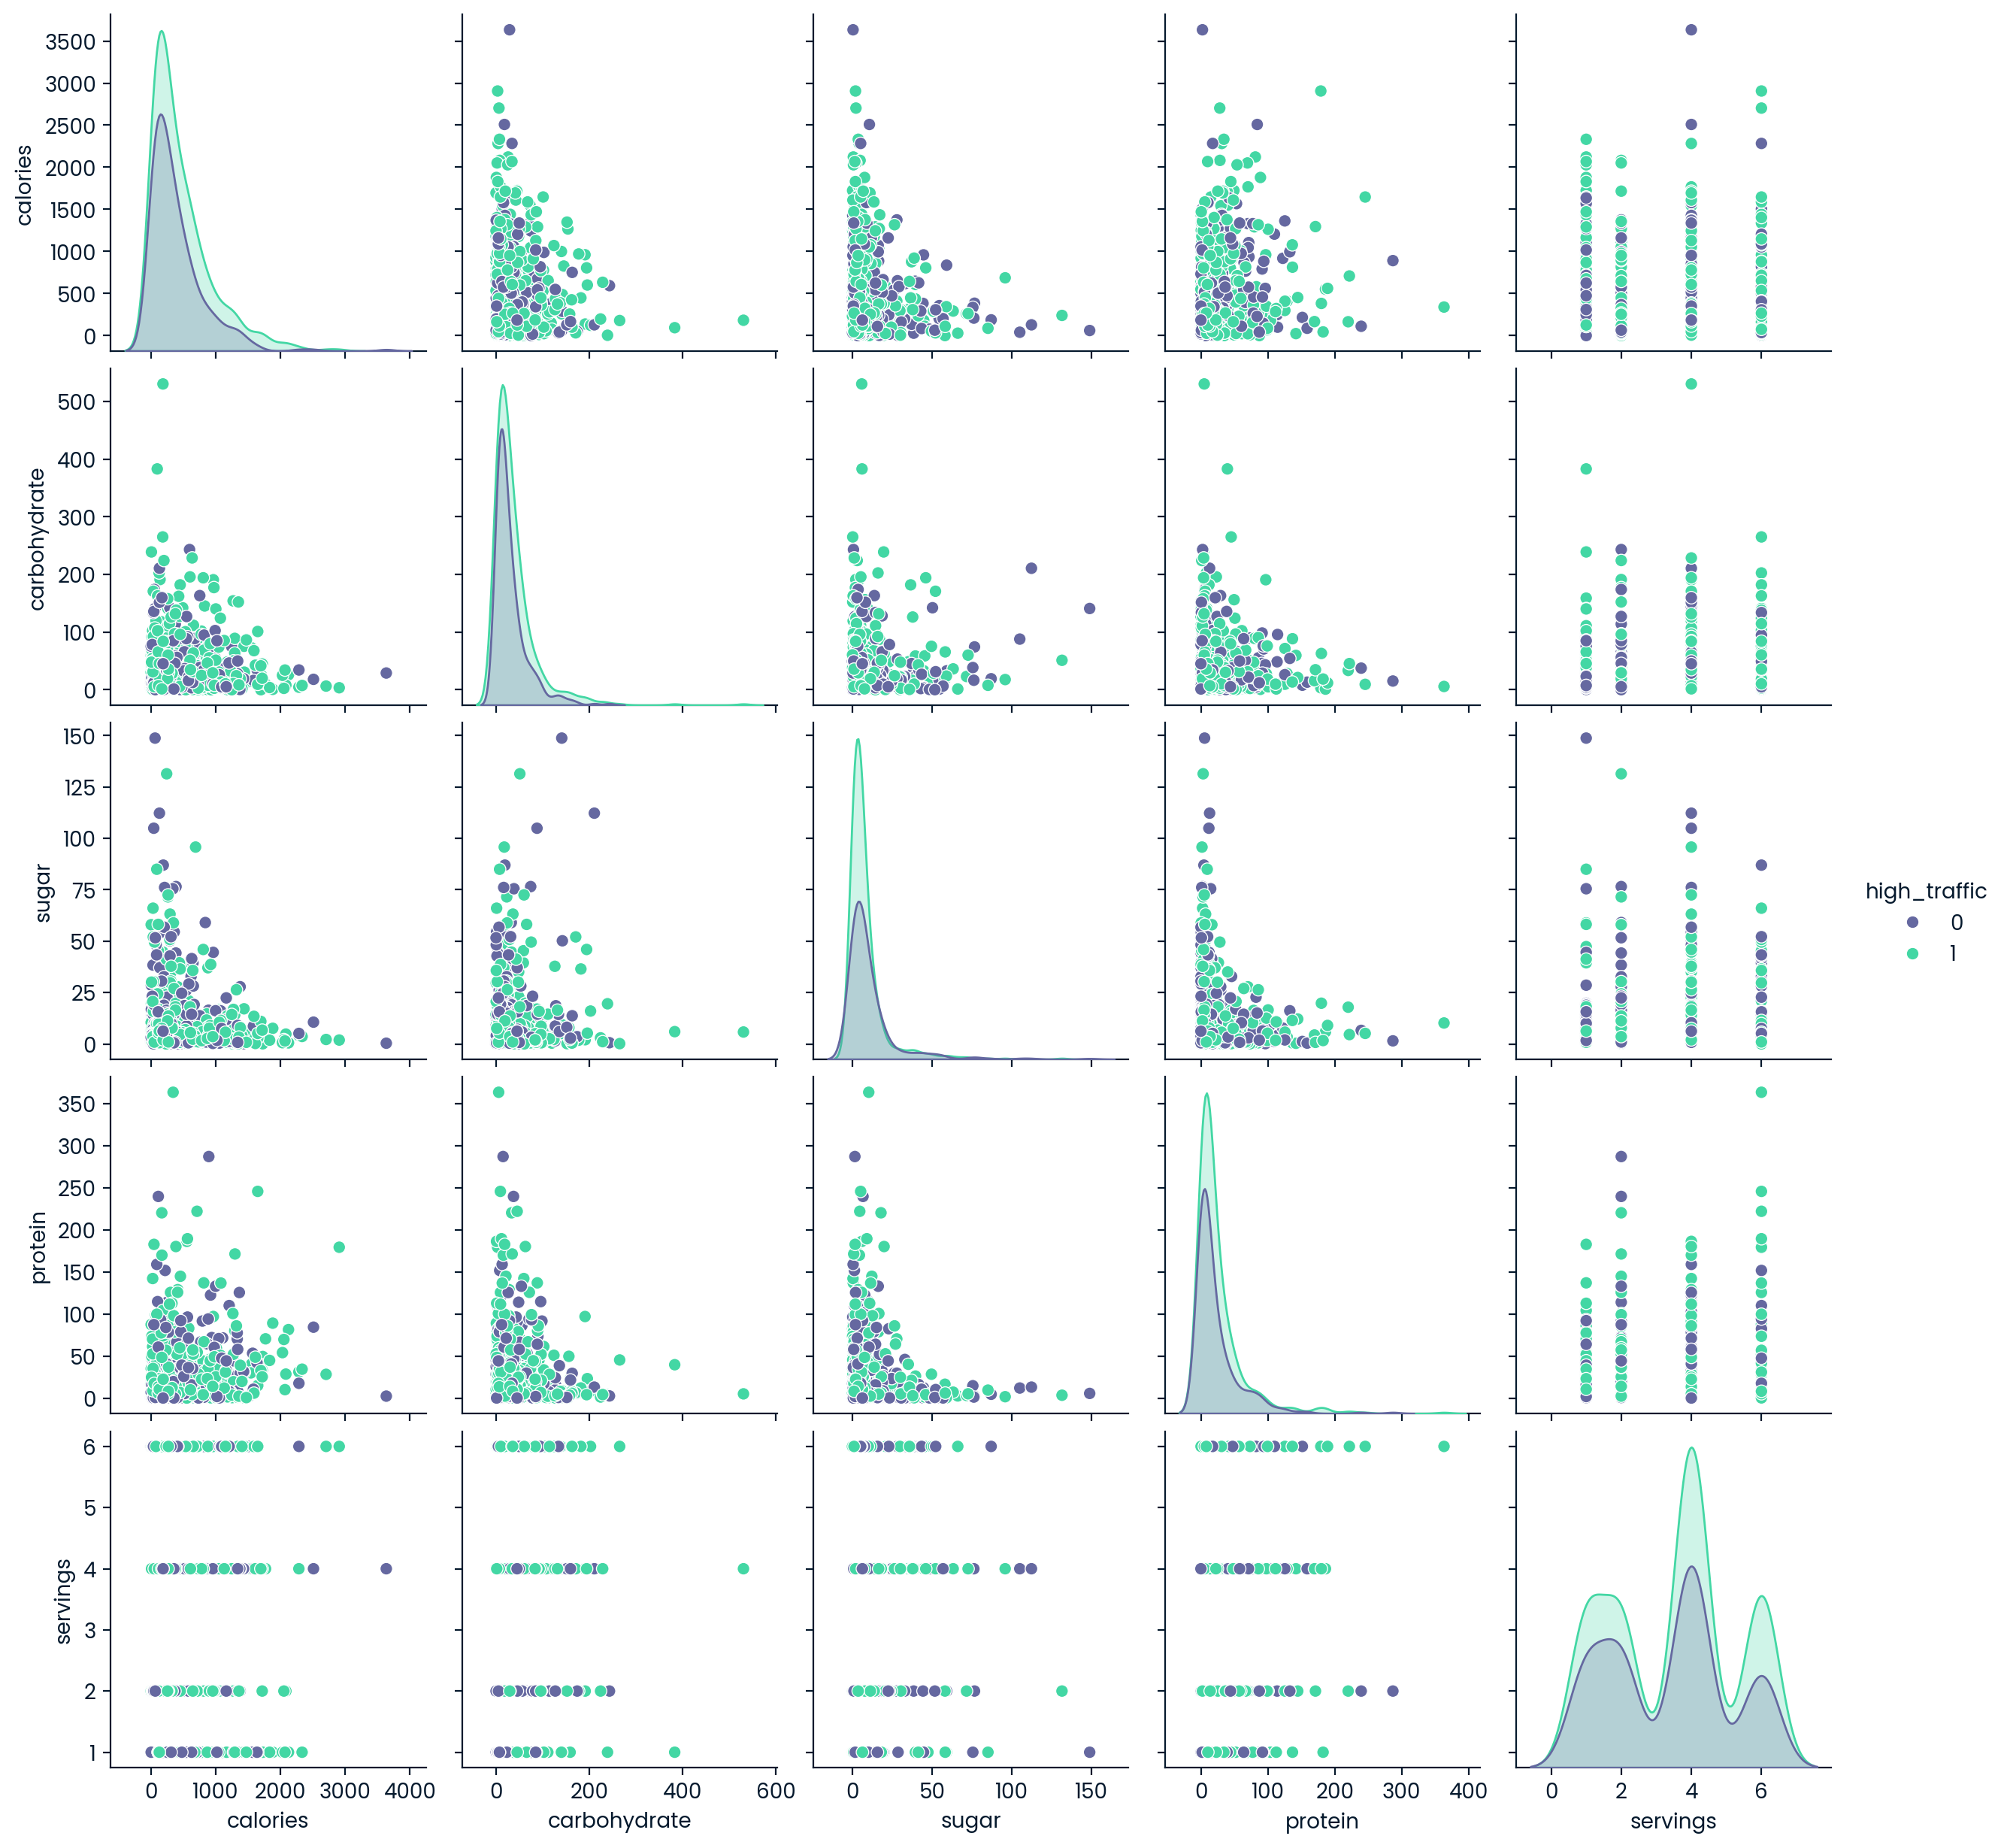

In [14]:
columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']
sns.pairplot(recipes[columns], hue='high_traffic')
plt.show()

- The data is skewed right for all key nutritional indicators (calories, carbohydrates, sugar, protein).
- There are clear correlations between the different nutritional indicators, especially between calories, carbohydrates and protein.
- There is no clear correlation between traffic levels and nutritional indicators.
- The number of servings in recipes affects the calorie content and other nutritional indicators.

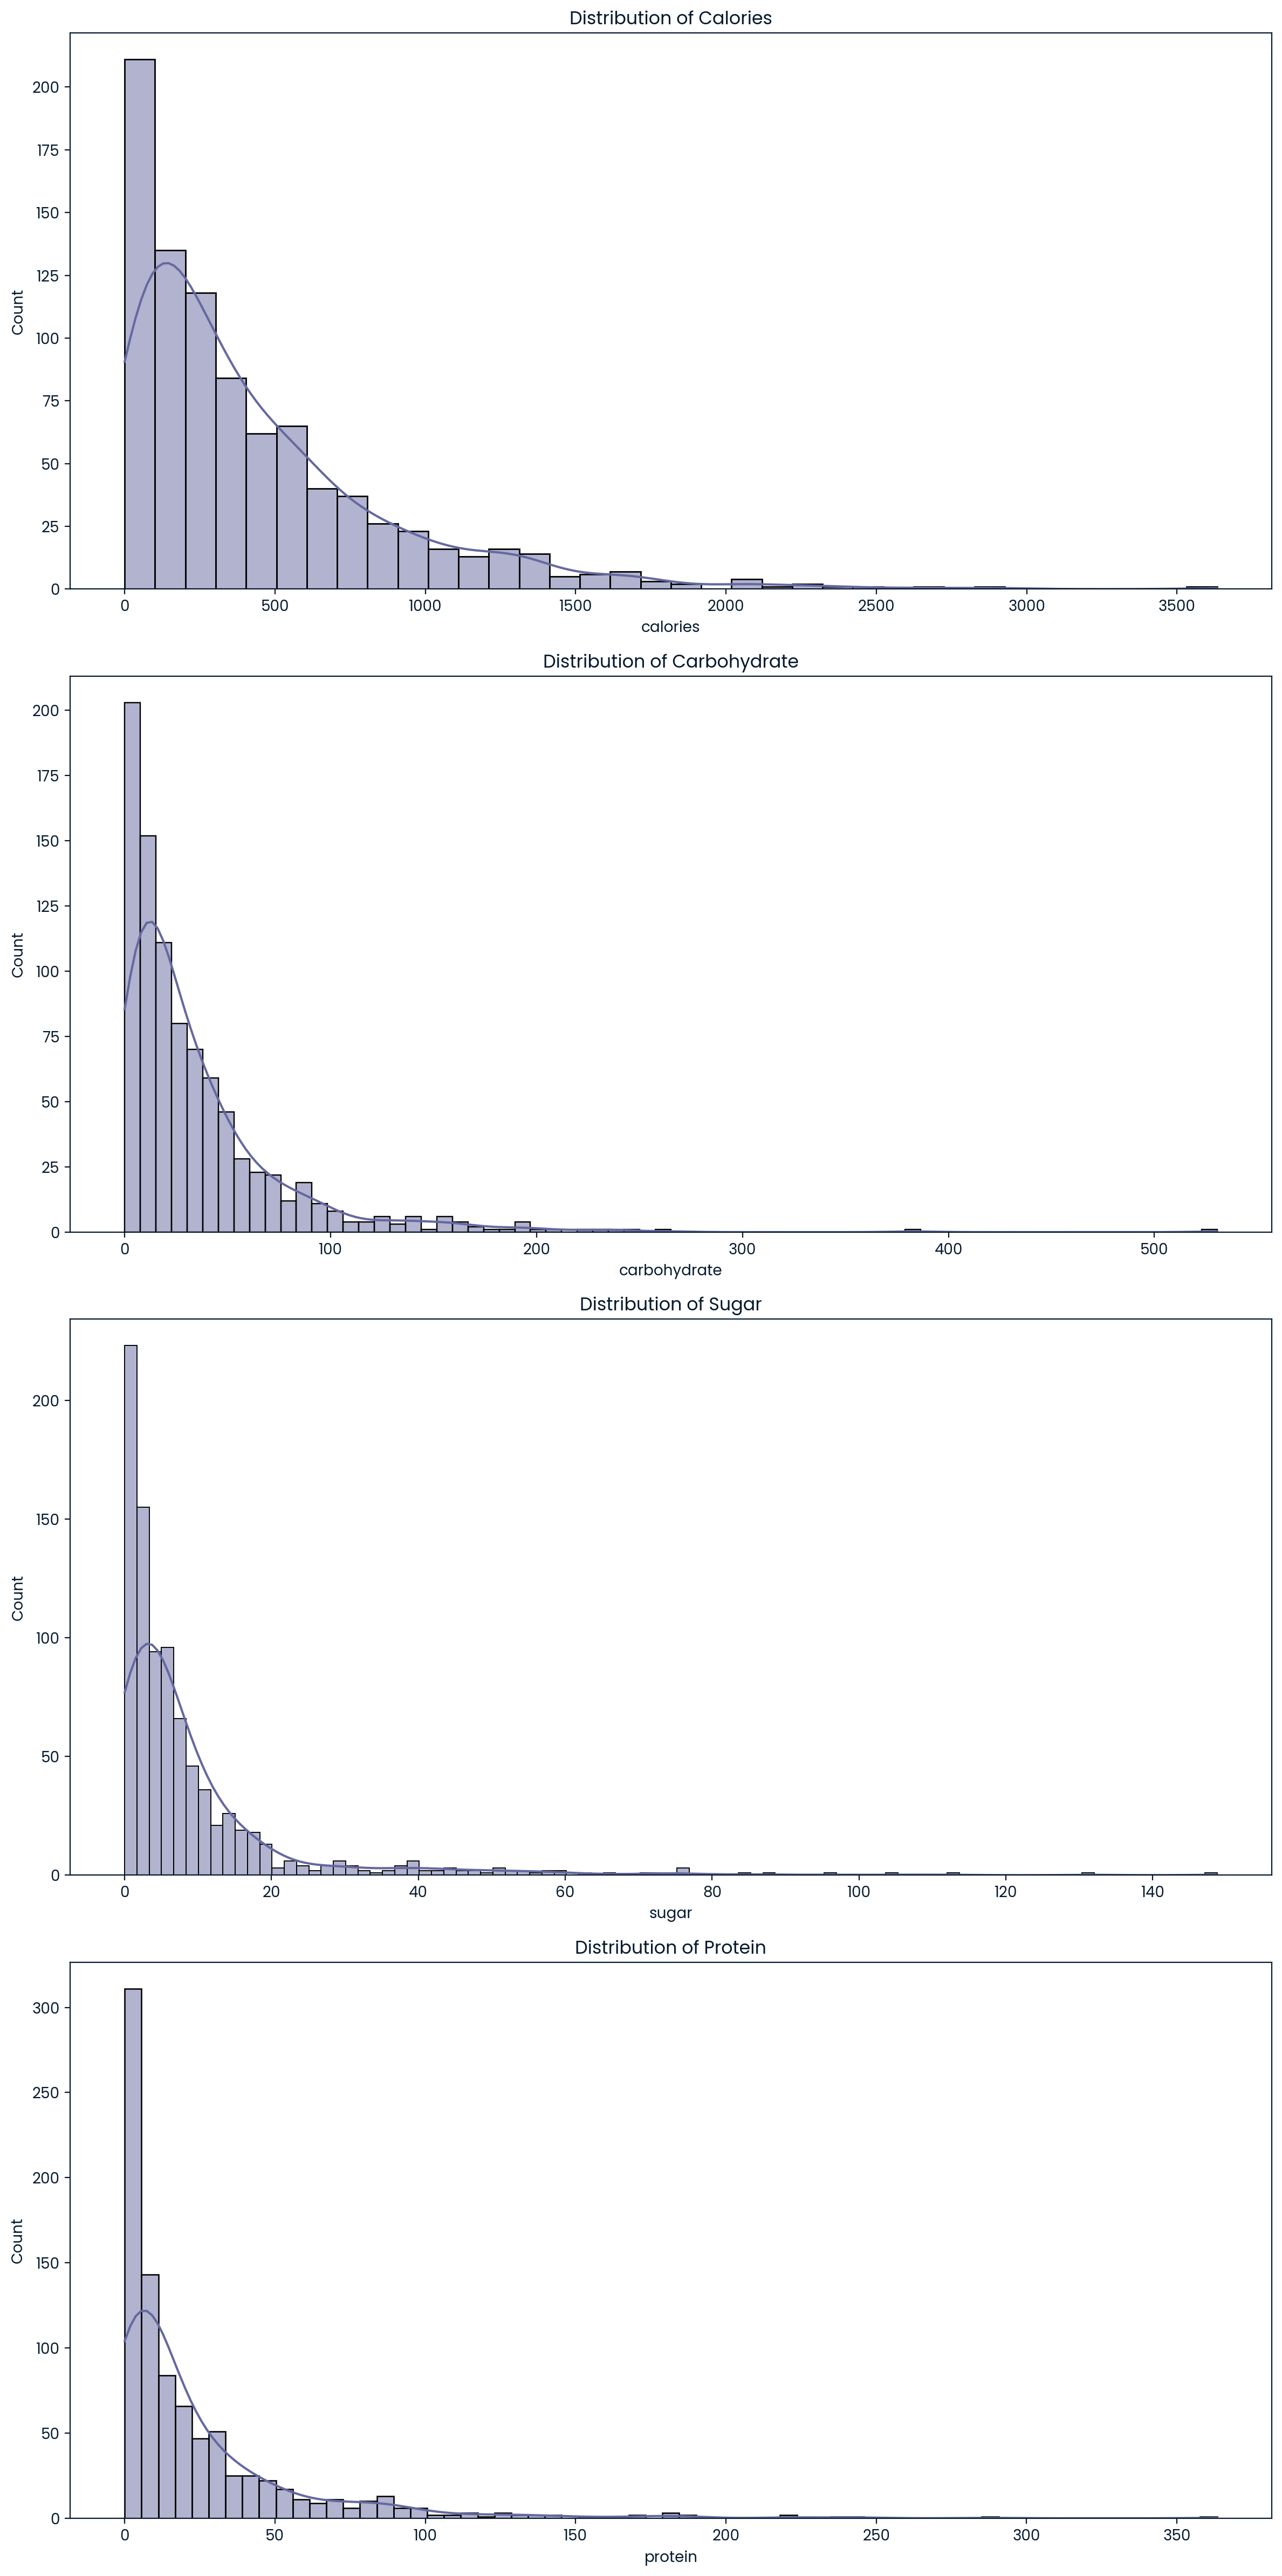

In [15]:
fig, axes = plt.subplots(len(columns_nutritions), 1, figsize=(12, 24))

for ax, column in zip(axes, columns_nutritions):
    sns.histplot(data=recipes, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

plt.tight_layout()
plt.show()

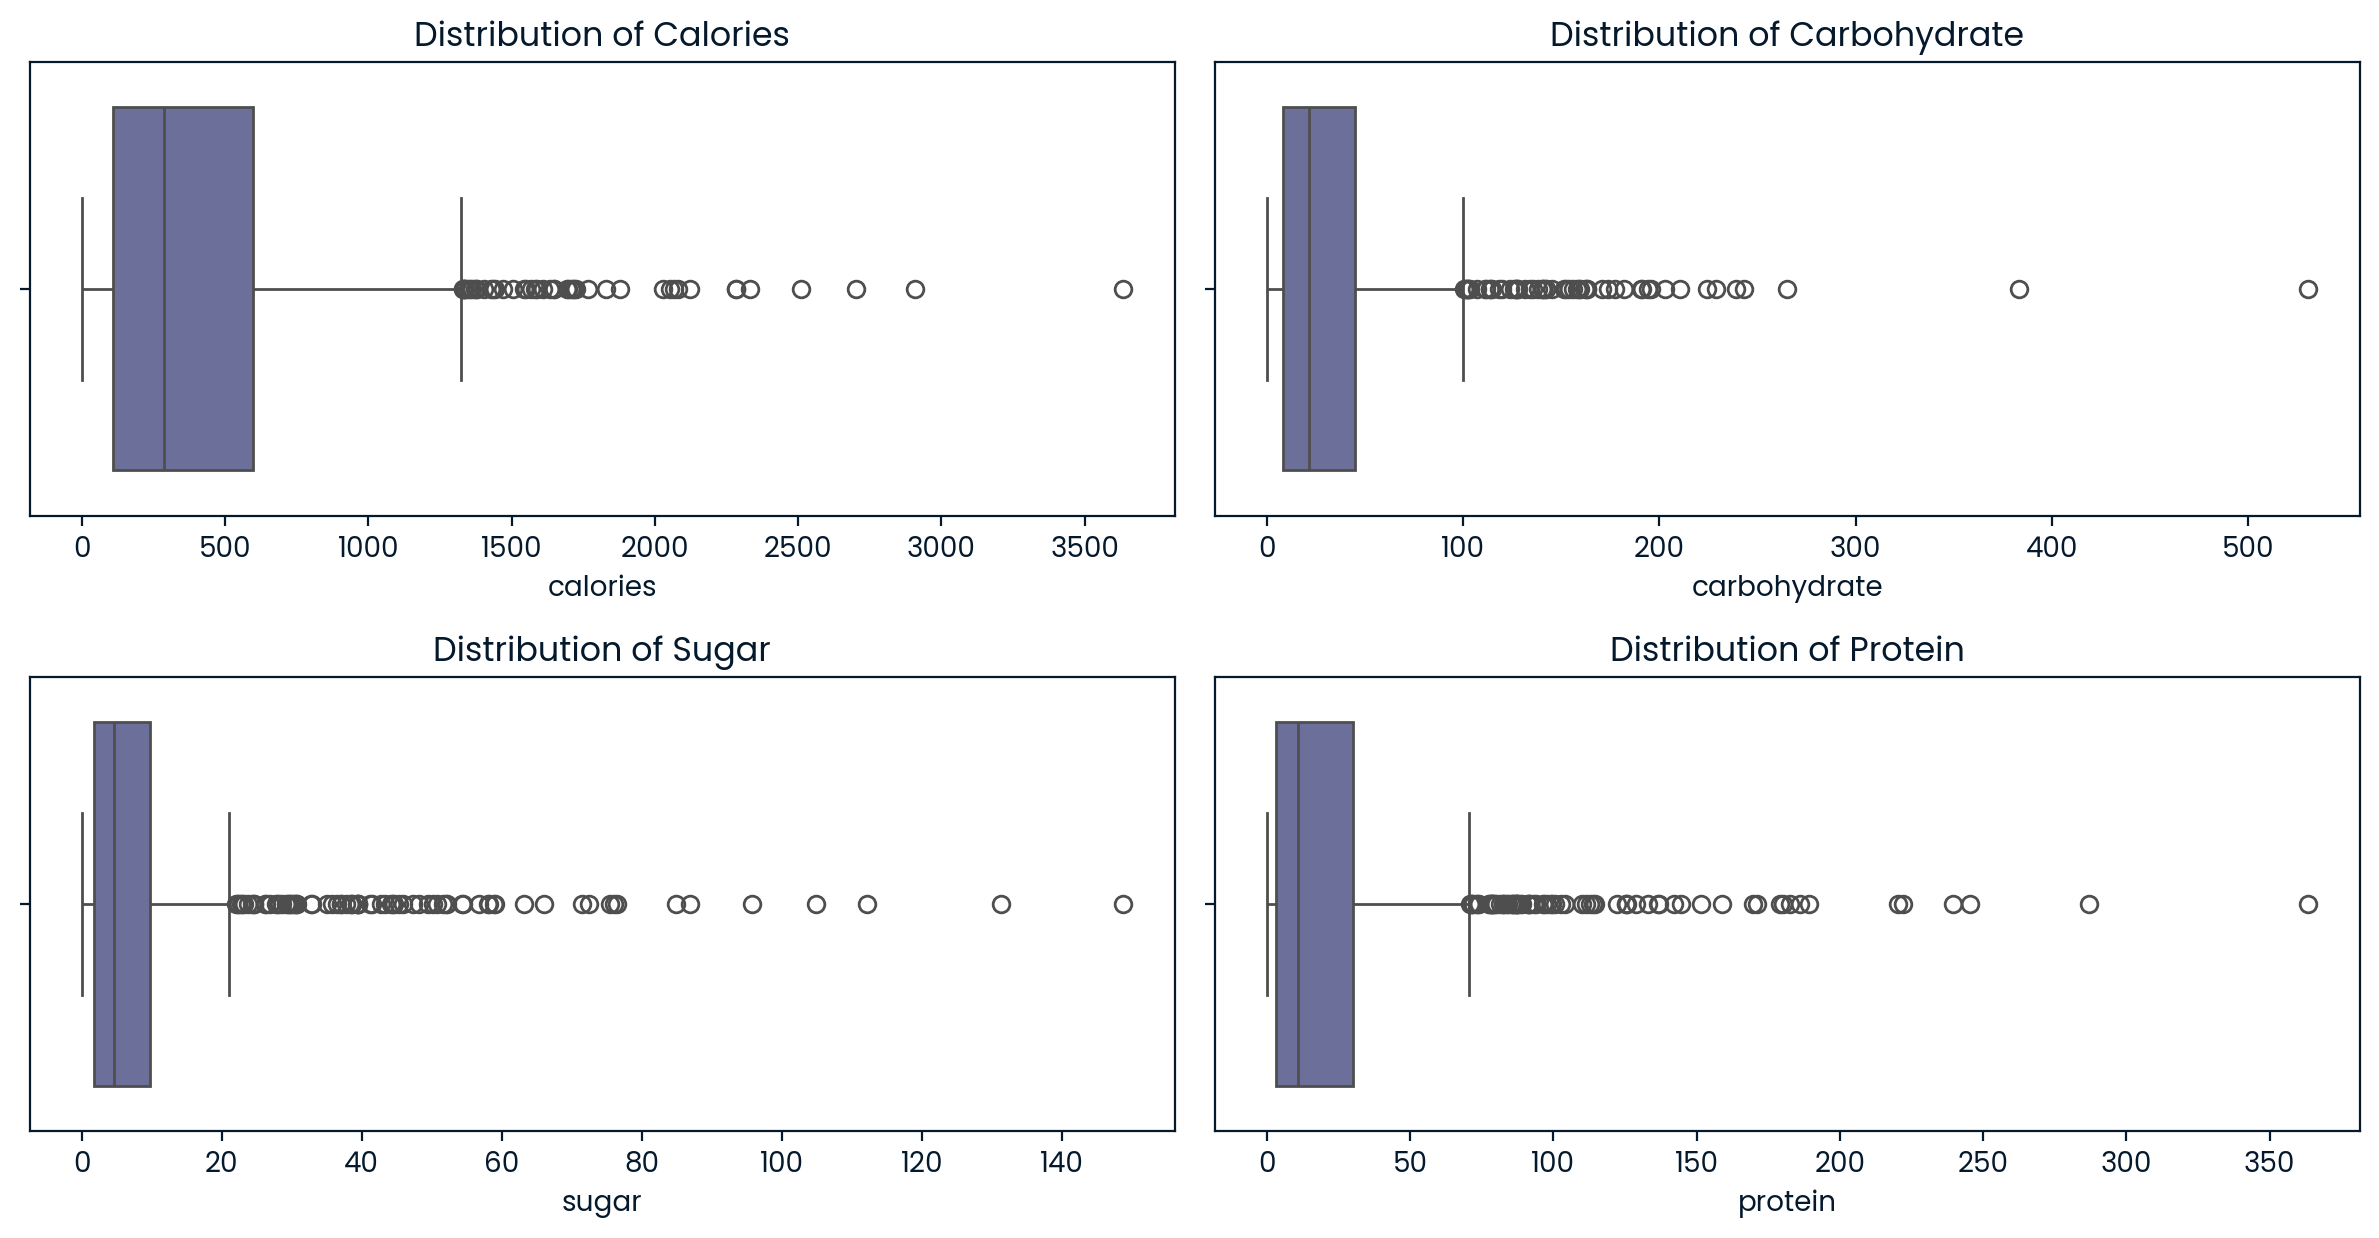

In [16]:
fig, axes = plt.subplots(len(columns_nutritions), 2, figsize=(12, 12))

for ax, column in zip(axes.flat, columns_nutritions):
    sns.boxplot(data=recipes, x=column, orient='v', ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")
    
for ax in axes.flat[len(columns_nutritions):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

## Distribution of variables:
- All four variables show an asymmetric distribution with a ‘long tail’ to the right. This is characteristic of data with positive skewness (skewed right).
- The histograms show that the bulk of the data is concentrated in the low value ranges. For all variables, a significant number of observations are closer to zero, and high values are much less common.
## Outliers:
- Many outliers can be seen on all boxplots, especially on the right side of the range. This indicates that a small portion of the data is out of the main array, but it has a significant effect on the distribution.
- The outliers are particularly noticeable for the variables calories, carbohydrate and sugar. The protein variable also shows a similar pattern, but there are fewer outliers.
## Median and interquartile range:
- In the boxplots, it can be seen that the median (centre line) for all variables is closer to the lower end of the range, confirming the positive asymmetry of the distribution.
- The interquartile range (boxplot size) is quite narrow, indicating that most of the data is concentrated within a small range of values.

In [17]:
# Let's look at relationship between `servings` and `high_traffic`.
high_traffic_servings = recipes.groupby(['servings', 'high_traffic'])['recipe'].count().unstack()
high_traffic_servings_nrmlzd = round(high_traffic_servings.apply(lambda x: x / x.sum(), axis=1), 2)
print(high_traffic_servings_nrmlzd)

high_traffic     0     1
servings                
1             0.41  0.59
2             0.44  0.56
4             0.40  0.60
6             0.36  0.64


I notice that the recipes with 6 servings have the most traffic.

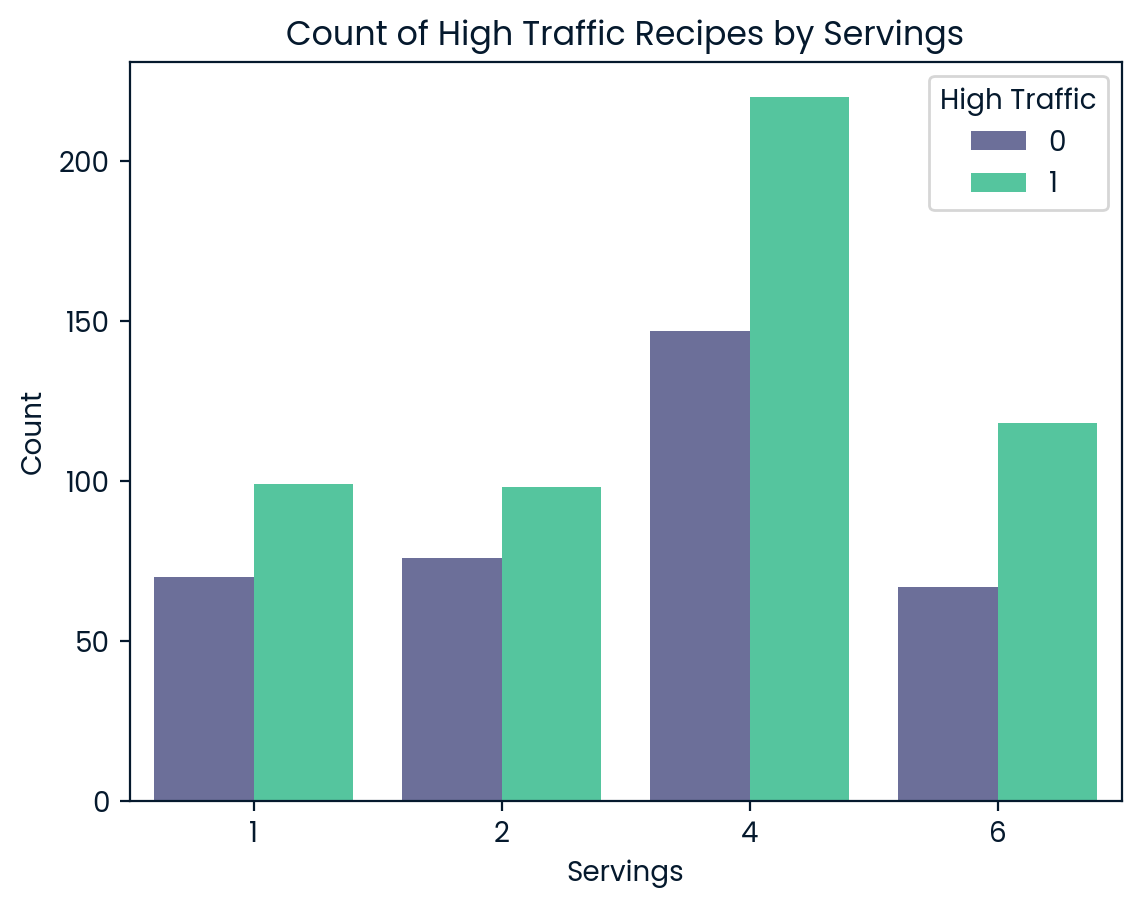

In [18]:
sns.countplot(x="servings", hue="high_traffic", data=recipes)
plt.xlabel("Servings")
plt.ylabel("Count")
plt.title("Count of High Traffic Recipes by Servings")
plt.legend(title="High Traffic")
plt.show()

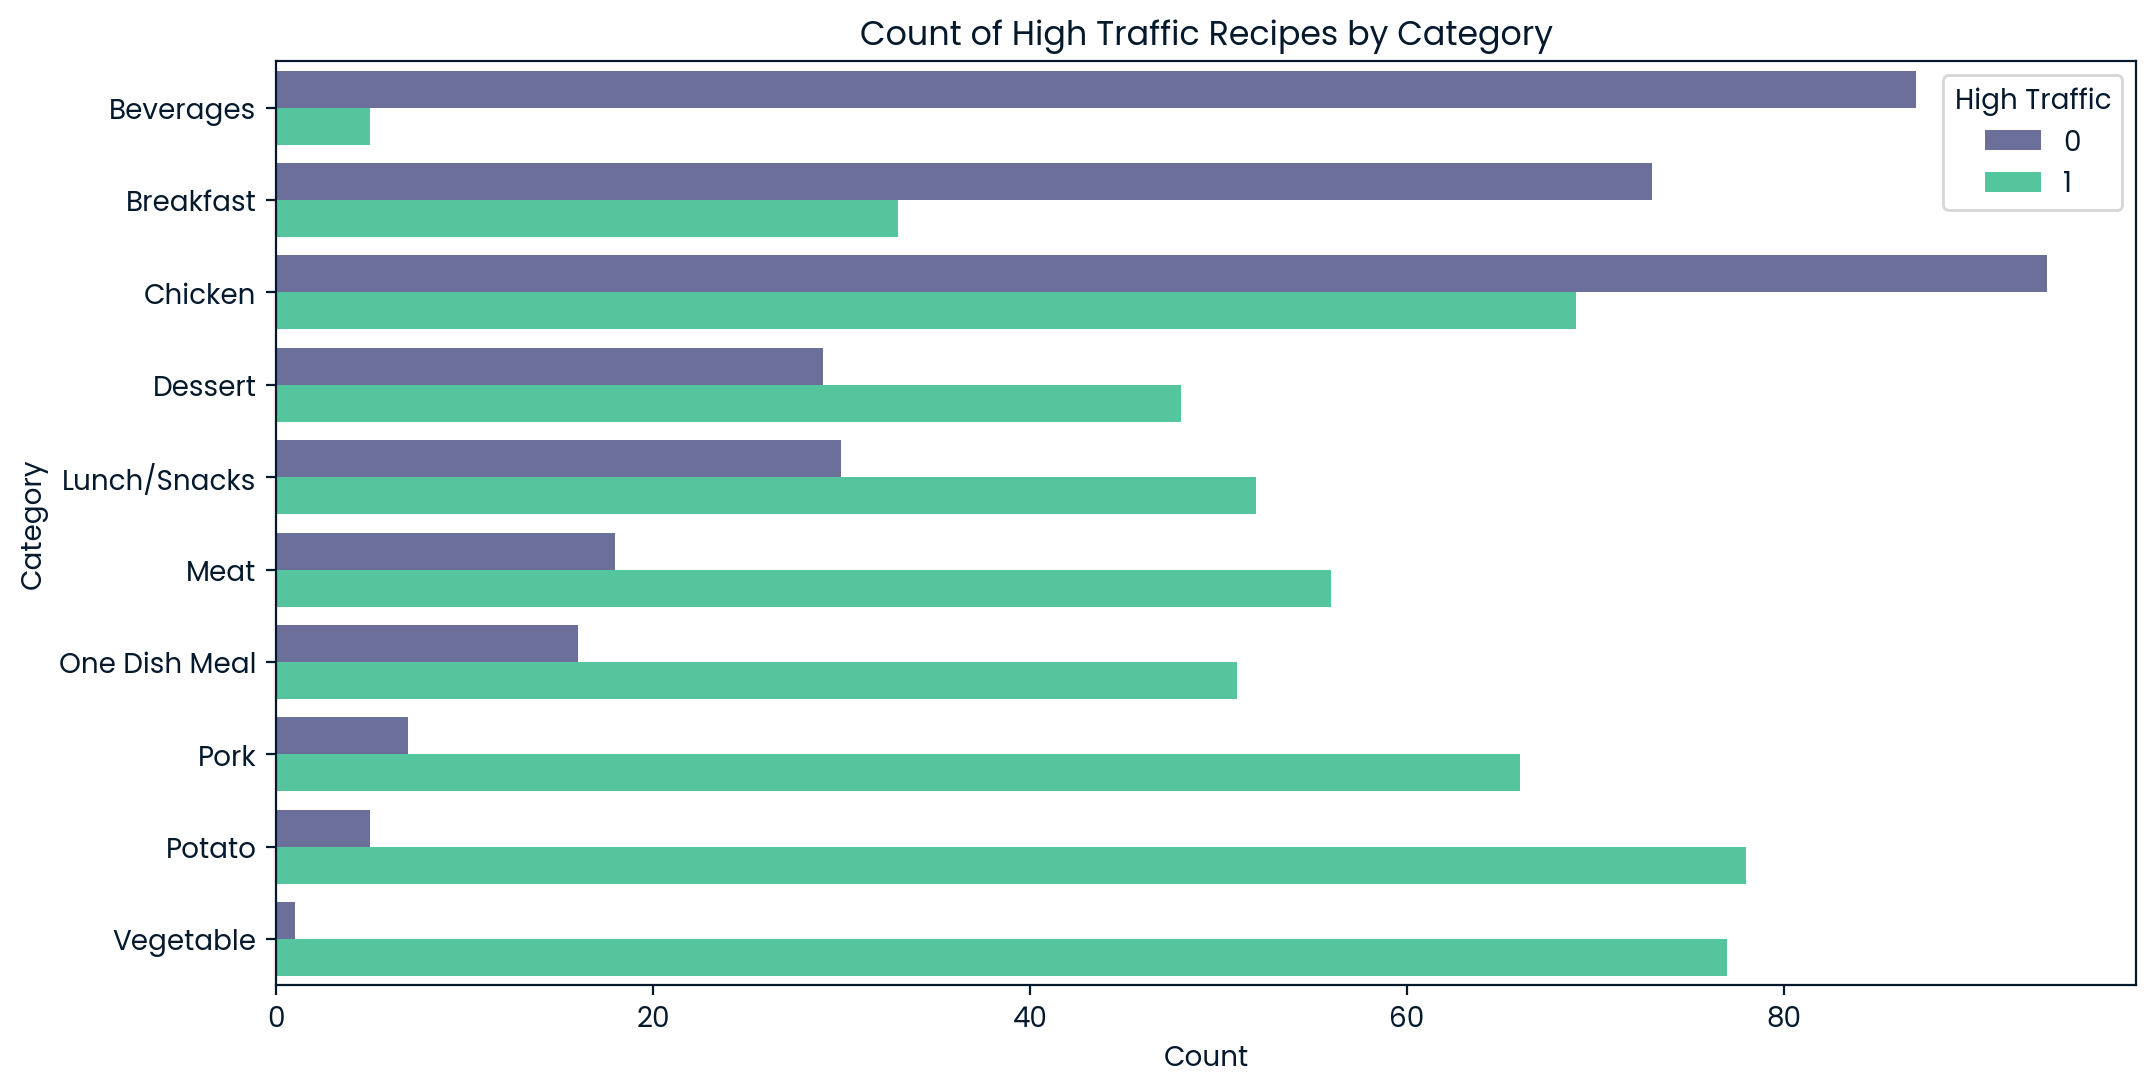

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y="category", hue="high_traffic", data=recipes)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Count of High Traffic Recipes by Category")
plt.legend(title="High Traffic")
plt.show()

**Graph with number of recipes by number of servings**: Overall, recipes with 4 servings seem to be the most popular for site users, whether they have high traffic or not.
- Recipes with 4 servings are clearly the most popular of all. They make up the largest share for both High Traffic recipes and those that don't get as much attention.
- The 1 serving recipes also attract a fair amount of traffic, although the number is smaller than for the 4 servings.
- Fewer recipes, such as those with 6 servings, have significantly higher traffic among the high-traffic recipes.
## Graph with the number of recipes by category:
- Some categories like _Chicken_, _Pork_, _Potato_, _Vegetable_ have high traffic which may indicate the popularity of these types of recipes among users.
- Categories such as _Beverages_ and _Breakfast_, have more recipes that did not attract high traffic. This may indicate that these types of recipes are less popular or harder to find on the site.
- _Pork_, _Potato_ and _Vegetable_ are the categories where most of the recipes attract high traffic, which may indicate users' preferences for healthy eating or certain dishes.

Based on the histograms and boxplot displayed above, the appropriate transformation method would be Yeo-Johnson transformation as the values are positive, there are zero values in the data, the data is asymmetric and there is imbalance. 

In [20]:
# Perform transformation.
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(recipes[columns_nutritions])

recipes_transformed = recipes.copy()
recipes_transformed[columns_nutritions] = transformed_data
# Check transformed data.
recipes_transformed.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,-1.392371,0.555369,-1.369492,-1.339950,Potato,4,1
1,3,1.156281,0.648748,-0.268283,-0.812251,Breakfast,1,0
2,4,-0.809689,0.345711,1.752953,-1.812703,Beverages,4,1
3,5,-1.525153,-1.625851,-1.262119,-1.509840,Beverages,4,0
4,6,0.848294,-1.292229,-0.773013,1.193668,One Dish Meal,2,1


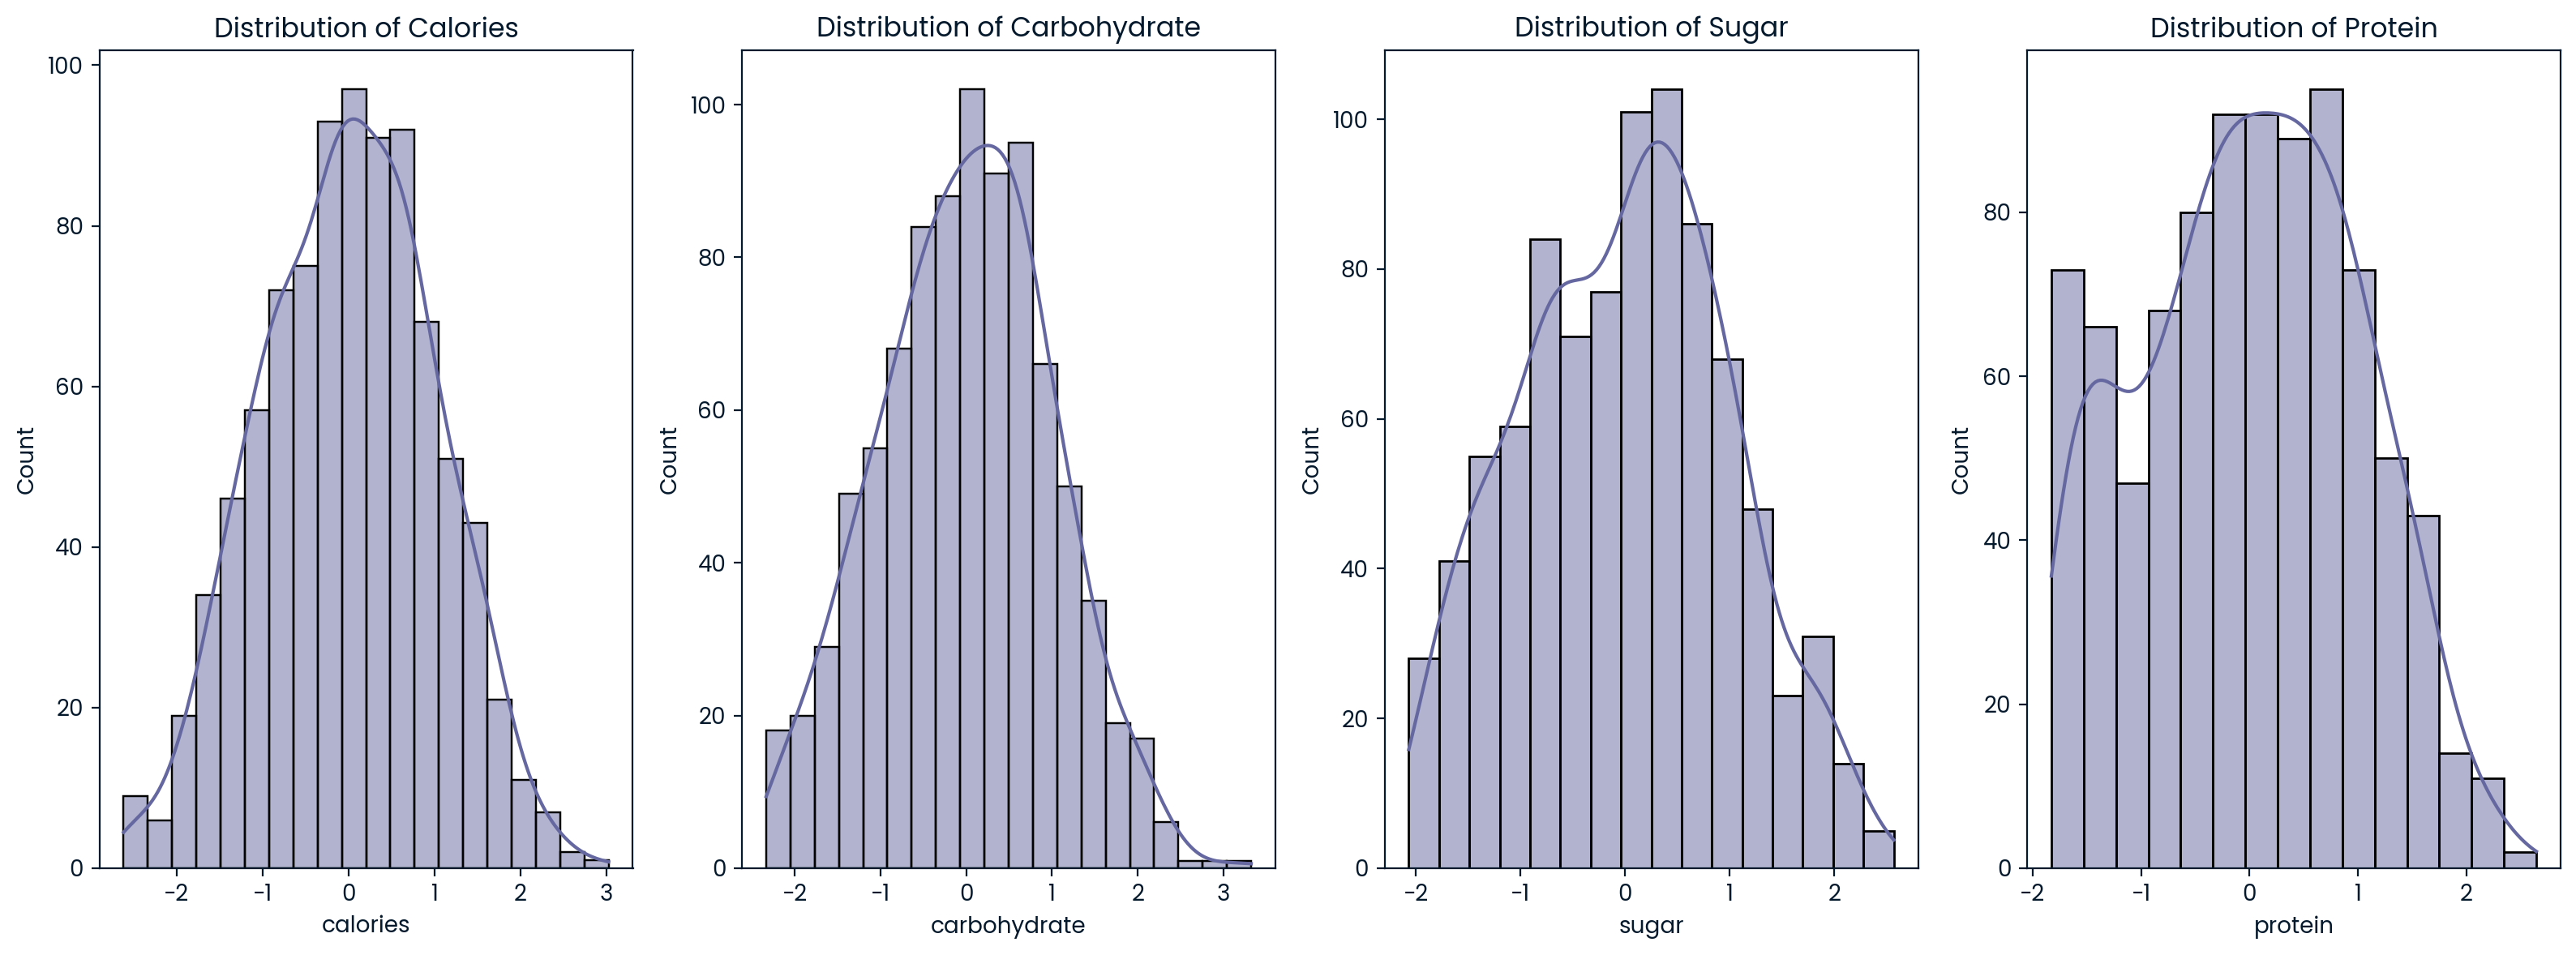

In [21]:
fig, axes = plt.subplots(1, len(columns_nutritions), figsize=(16, 6))

for i, column in enumerate(columns_nutritions):
    sns.histplot(data=recipes_transformed, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')

plt.tight_layout()
plt.show()

In contrast to the original data, where strong skewness was observed and high values were present, the transformation smoothed the distribution and reduced the number of outliers.

In [22]:
# One_hot encoding for RandomForestClassifier (DF with no-transformed data).
recipes_encoded = pd.get_dummies(recipes, columns=["category"], prefix="category", dtype=int)
# One_hot encoding for LogisticRegression (DF with transformed data).
recipes_transformed_encoded = pd.get_dummies(recipes_transformed, columns=["category"], prefix="category", dtype=int)
recipes_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,2,35.48,38.56,0.66,0.92,4,1,0,0,0,0,0,0,0,0,1,0
1,3,914.28,42.68,3.09,2.88,1,0,0,1,0,0,0,0,0,0,0,0
2,4,97.03,30.56,38.63,0.02,4,1,1,0,0,0,0,0,0,0,0,0
3,5,27.05,1.85,0.80,0.53,4,0,1,0,0,0,0,0,0,0,0,0
4,6,691.15,3.46,1.65,53.93,2,1,0,0,0,0,0,0,1,0,0,0


In [23]:
recipes_transformed_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,2,-1.392371,0.555369,-1.369492,-1.339950,4,1,0,0,0,0,0,0,0,0,1,0
1,3,1.156281,0.648748,-0.268283,-0.812251,1,0,0,1,0,0,0,0,0,0,0,0
2,4,-0.809689,0.345711,1.752953,-1.812703,4,1,1,0,0,0,0,0,0,0,0,0
3,5,-1.525153,-1.625851,-1.262119,-1.509840,4,0,1,0,0,0,0,0,0,0,0,0
4,6,0.848294,-1.292229,-0.773013,1.193668,2,1,0,0,0,0,0,0,1,0,0,0


- _LogisticRegression_ is a linear model suitable for binary classification. It works well if the data is linearly separable.
- Likewise, for a prediction task with categorical features, _RandomForestClassifier_ will often be the best choice. It is robust to overfitting and has good performance even on small datasets. Unlike LogisticRegression, it can capture non-linear dependencies between features.

In [24]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    results = {}
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    results['train'] = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'f1_score': f1_score(y_train, y_train_pred)
    }
    
    y_test_pred = model.predict(X_test)
    results['test'] = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1_score': f1_score(y_test, y_test_pred)
    }
    
    return results

SEED = 1
# Split for Logistic Regression.
X_transformed = recipes_transformed_encoded.drop(columns=['high_traffic', 'recipe'])
y_transformed = recipes_transformed_encoded['high_traffic']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X_transformed, y_transformed, test_size=0.3, stratify=y_transformed, random_state=SEED
)

# Split for RandomForestClassifier.
X_encoded = recipes_encoded.drop(columns=['high_traffic', 'recipe'])
y_encoded = recipes_encoded['high_traffic']
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=SEED
)

# Hyperparameters grid.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(LogisticRegression(random_state=SEED), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_transformed, y_train_transformed)

# Best logistic model.
best_logistic_model = grid_search.best_estimator_
# print(best_logistic_model)

# RandomForestClassifier.
random_forest_model = RandomForestClassifier(random_state=SEED)

# Models evaluation.
logistic_results = evaluate_model(best_logistic_model, X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed)
random_forest_results = evaluate_model(random_forest_model, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)

# Output results.
print("Logistic Regression Results:")
print("train:", logistic_results['train'], "\ntest:", logistic_results['test'])

print("\nRandom Forest Classifier Results:")
print("train:", random_forest_results['train'], "\ntest:", random_forest_results['test'])

Logistic Regression Results:
train: {'accuracy': 0.7571884984025559, 'precision': 0.7952127659574468, 'recall': 0.7994652406417112, 'f1_score': 0.7973333333333332} 
test: {'accuracy': 0.7695167286245354, 'precision': 0.8152866242038217, 'recall': 0.7950310559006211, 'f1_score': 0.8050314465408805}

Random Forest Classifier Results:
train: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0} 
test: {'accuracy': 0.758364312267658, 'precision': 0.7926829268292683, 'recall': 0.8074534161490683, 'f1_score': 0.8}


### Overtraining in Random Forest:
- Random Forest shows perfect results on the training data (accuracy, precision, recall, F1-score = 100%), which may be a sign of overtraining. This means that the model has ‘memorised’ the training data too well, which may reduce its ability to generalise to new data (test set).
- On the test data, Random Forest shows accuracy = 75.84% and precision = 79.27%, which is similar to Logistic Regression but slightly lower.
### Logistic Regression generalises better:
- Logistic Regression shows more consistent results between the training and test dataset. The difference between Precision on training and test data is minimal, indicating a good balance between training and testing.
- Precision on the test data Logistic Regression has higher Precision on the test data at 81.53%, which is better than Random Forest (79.27%), indicating more accurate predictions of ‘High Traffic’ recipes.
### F1 measures on the test data:
- Logistic Regression: 80.50%
- Random Forest: 80%
- Both models have about the same F1-measure on the test data, which means that they are well balanced in terms of accuracy and completeness.
### Bottom line:
- Logistic Regression shows more stable results and better accuracy on the test data. The model has fewer overfitting problems and can generalise better to new data.
- Random Forest Classifier overtrained strongly on the training data, although on the test data it shows similar results to Logistic Regression, but with slightly lower accuracy.

# Definition of a metric for the business to monitor

## 1. How should the business monitor what they want to achieve?

The primary goal of the business is to accurately predict high traffic recipes in order to allocate resources effectively and promote recipes that are likely to drive more traffic to the website. The key metric the business should monitor is Precision for the "high traffic" class, as this directly reflects the ability of the model to correctly identify high-traffic recipes.

### Other relevant metrics to track:

- Recall: Measures how well the model captures all actual high-traffic recipes.
- F1-Score: A balance between precision and recall, especially useful when both false positives and false negatives have a cost to the business.
- Accuracy: General metric for overall prediction correctness but should not be the sole focus due to the imbalance in high-traffic and non-high-traffic recipe occurrences.

The business should continuously monitor Precision as a key performance indicator (KPI) since it reflects the accuracy in predicting high traffic, minimizing false positives that may cause wasted marketing efforts on recipes that don't generate traffic.

## 2. Estimate the Initial Value(s) for the Metric Based on the Current Data

Based on the models trained today (Logistic Regression and Random Forest Classifier), the business can use the following baseline metric values:

- Logistic Regression (Precision on test data): 81.53%
- Random Forest Classifier (Precision on test data): 79.27%

Currently, Logistic Regression demonstrates higher precision and is a suitable model for deployment. However, Random Forest may still be considered for further tuning. The initial value for precision should be set to approximately 80% based on these results.

## 3. Analysis of High Traffic Categories

In addition to monitoring general traffic patterns, certain recipe categories were found to be more likely to generate high traffic. Based on an analysis of the dataset, the following categories stand out as having a higher proportion of high-traffic recipes:

- Chicken: This category consistently showed high traffic in comparison to other categories. Recipes that include chicken are likely to attract more users.
- Vegetable: This category also performed well in terms of attracting high traffic. As plant-based diets gain popularity, this category is becoming increasingly important.
- Pork and Potato: These categories also show significant high-traffic potential.

On the other hand, categories like Beverages, Desserts, and Breakfast had relatively lower high-traffic proportions. While they may still contribute to overall website engagement, the business should consider focusing marketing efforts on the top-performing categories for more consistent results.

# Final Summary Including Recommendations

Based on the current analysis and model evaluation, the following are key recommendations for the business to achieve its goal of accurately predicting high-traffic recipes:

- Focus on Precision as the Primary Metric: Given the goal of correctly identifying high-traffic recipes, precision is crucial to minimize wasted resources on recipes that are incorrectly classified as high traffic.

- Deploy the Logistic Regression Model: As it demonstrated higher precision (81.53%) and a good balance between other metrics, this model is currently the best candidate for deployment. It can predict high traffic recipes more reliably than the Random Forest model.

- Implement Continuous Monitoring: The business should continuously track precision, recall, and F1-score to ensure that the model maintains good performance as the website grows and user behavior shifts. Additionally, regular retraining of the model using updated data will ensure it remains accurate over time.

- Consider Data Enrichment: If there are gaps in the prediction capability, the business may want to explore additional data features (e.g., user interaction data, seasonal trends) that could improve the model’s ability to predict high traffic recipes.

- Focus on High-Traffic Categories: Special attention should be given to promoting and featuring recipes in the Chicken, Vegetable, Pork and Potato categories, as these have shown to consistently attract high traffic. Marketing campaigns focused on these types of recipes are likely to yield the best results.

- Iterate on Model Tuning: Although the Logistic Regression model performed well, further hyperparameter tuning or exploration of more complex models may yield incremental improvements. The Random Forest model could be re-explored with more fine-tuned parameters to reduce overfitting and improve precision.

By focusing on these key metrics and recommendations, the business can effectively meet its objective of identifying and promoting high-traffic recipes, driving more users to the site and improving overall business performance.